# Анализ поведения пользователей в мобильном приложении

**Цель проекта:**

1. Проанализируйте связь целевого события — просмотра контактов — и других действий пользователей. 
2. Оценить, какие действия чаще совершают те пользователи, которые просматривают контакты.


# Структура проекта

**Шаг 1 Чтение и предобработка данных**

* Прочесть датасеты и изучить общую информацию
* Привести, если необходимо, названия столбцов к единому стилистическому формату
* Проверить данные на наличие явных и неявных дубликатов и пропусков, при наличии исправить
* Проверить типы данных, при необходимости привести к нужному типу
* Добавить столбец даты и времени, а также отдельный столбец дат
* Посмотреть стоит ли перевести миллисекунды в секунды - почему?

**Шаг 2 Исследовательский анализ данных (EDA)**

* Сколько всего событий в датасете?
* Сколько всего пользователей в датасете?
* Сколько в среднем событий приходится на одного пользователя?
* Данные за какой период представлены в датасете? Найти максимальную и минимальную дату. Построить гистограмму по дате и времени.
* Рассчитать и визуализировать DAU / WAU в представленном датасете - есть ли закономерности в пользовательском поведении?

**Шаг 3 Изучить поведенческие сценарии**
* Посмотреть, какие события есть в датасете, как часто они встречаются. Отсортировать события по частоте.
* Посчитать, сколько уникальных пользователей совершали каждое из этих событий. Отсортируйте события по числу уникальных пользователей.
* Разбить все события на сессии в разрезе уникальных пользователей. На основе сессий предположить, в каком порядке происходят события. Выявить поведенческие сценарии, их количество.
* По сценариям описать воронки (конверсии) - какая доля пользователей проходит на следующий шаг каждой воронки (от числа пользователей на предыдущем). Выявить сценарии с лучшей и худшей конверсиями за представленный период.
* В разрезе поведенческих сценариев проанализировать, какая доля пользователей доходит от первого события до просмотра контактов?
* Проанализировать как различается время в разрезе поведенческих сценариев пользователей?
* Посмотреть влияет ли источник привлечения пользователя на долю пользователей, совершивших целевое действие - просмотр контактов.

**Шаг 4 Формулировка статистических гипотез**

* Одни пользователи совершают действия `tips_show` и `tips_click`, другие — только `tips_show`. Проверить гипотезу: конверсия в просмотры контактов различается у этих двух групп.
* Проверить гипотезу о разности между конверсиями в просмотры контактов среди пользователей пришедших из разных источников - `google` и `яндекс`.
* Проверить статистическую значимость различий средней длительности сессии между пользователями, пришедшими из `google` и `yandex`.

**Оглавление:**
<a id='section_id'></a>

1. [Импорт библиотек и загрузка данных](#section_id1)

2. [Исследовательский анализ данных (EDA)](#section_id2)

3. [Поведенческие сценарии](#section_id3)

4. [Проверка статистических гипотез](#section_id4)

5. [Результаты исследования](#section_id5)


## Импорт библиотек и загрузка данных
<a id='section_id1'></a>

In [119]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mth
import datetime

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go

from IPython.display import display, HTML
import warnings

In [120]:
# Формат отображения данных - отображение всех колонок и ограничиваю количество знаков после запятой
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_colwidth = 50
# формат отображения ячеек с кодом:
display(HTML("<style>.container{width:80% !important;}</style"))

# форматирую вывод графиков
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [16]:
mobile_sourсes, mobile_dataset = (
    pd.read_csv('datasets/mobile_sources.csv'),
    pd.read_csv('datasets/mobile_dataset.csv')
)

### Обзор данных

In [17]:
mobile_sourсes.head(3)

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex


In [18]:
mobile_sourсes.tail(3)

,userId,source
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,yandex
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex
4292,d157bffc-264d-4464-8220-1cc0c42f43a9,google


In [19]:
mobile_sourсes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [20]:
mobile_dataset.head(3)

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [21]:
mobile_dataset.tail(3)

,event.time,event.name,user.id
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74196,2019-11-03 23:58:12.532487,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9


In [22]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


При первичном обзоре данных пропусков в датасетах не выявлено.

### Предобработка данных

В ходе предобработки переименую колонки, проверю на дубликаты, в датасете `mobile_dataset` необходимо будет добавить колонки с датой и временем.

**Приведу названия колонок в датасетах к единому стилистическому формату**

In [23]:
# Приведу все символы в названиях столбцов таблиц к единому стилистическому формату

for df in [mobile_sourсes, mobile_dataset]:
    df.columns = df.columns.str.replace('.', '_', regex=True)
    df.columns = df.columns.str.replace('userId', 'user_id')
    print(df.columns)

Index(['user_id', 'source'], dtype='object')
Index(['event_time', 'event_name', 'user_id'], dtype='object')


In [24]:
df.columns = df.columns.str.replace('.', '_', regex=True)

**Преобразование колонок с датой и временем**

Время событий указано с гранулярностью до миллисекунд.

Посмотрю на случайное событие по отдельному пользователю, чтобы понять играют ли роль миллисекунды в поведенческом сценарии и нужна ли такая гранулярность в дальнейшем анализе.

In [25]:
mobile_dataset[(mobile_dataset['event_name'] == 'map') 
               & (mobile_dataset['user_id'] == 'ed13f6f0-08f4-4561-852e-456580f7a40d')].head(6)

,event_time,event_name,user_id
421,2019-10-07 11:10:39.701908,map,ed13f6f0-08f4-4561-852e-456580f7a40d
422,2019-10-07 11:10:39.913731,map,ed13f6f0-08f4-4561-852e-456580f7a40d
423,2019-10-07 11:10:40.185470,map,ed13f6f0-08f4-4561-852e-456580f7a40d
424,2019-10-07 11:10:40.604284,map,ed13f6f0-08f4-4561-852e-456580f7a40d
425,2019-10-07 11:10:40.873885,map,ed13f6f0-08f4-4561-852e-456580f7a40d
429,2019-10-07 11:11:32.094258,map,ed13f6f0-08f4-4561-852e-456580f7a40d


Пользователь зашёл в карту объявления, в строках 421-425 отражено 5 событий за период меньше 1 секунды. Возможно, пользователь скроллил карту, таким образом по своей сути это похоже на одно событие.

Таким образом округлю время до секунд, это не избавит датасет от дубликатов (на рассмотренном примере останутся 2 строчки с просмотром карты после удаления дубликатов), но снизит дублирующие события в более чем 2 раза. При дальнейшем анализе отдельно посмотрю как повлияют похожие оставшиеся дубли на результат исследования. 

In [26]:
# Выделение даты и времени, даты, недели в отдельные колонки с изменением типа данных
mobile_dataset['event_date_time'] = pd.to_datetime(mobile_dataset['event_time']).dt.round('1S')
mobile_dataset['event_date'] = mobile_dataset['event_time'].astype('datetime64[D]')
mobile_dataset['event_week'] = mobile_dataset['event_date'].dt.isocalendar().week.astype('int')

#Избавлюсь от изначального столбца со временем
mobile_dataset = mobile_dataset.drop(columns='event_time')

mobile_dataset.head()

,event_name,user_id,event_date_time,event_date,event_week
0,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07 00:00:00,2019-10-07,41
1,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07 00:00:01,2019-10-07,41
2,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07 00:00:02,2019-10-07,41
3,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07 00:00:07,2019-10-07,41
4,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07 00:00:56,2019-10-07,41


**Проверка дубликатов**

In [27]:
print('Количество явных дубликатов в датасетах')
print('mobile_sourсes:', mobile_sourсes.duplicated().sum())
print('mobile_dataset:', mobile_dataset.duplicated().sum())

Количество явных дубликатов в датасетах
mobile_sourсes: 0
mobile_dataset: 1118


In [28]:
# Проверю датасет по неявным дубликатам, сгруппированным по событиям
mobile_dataset['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

In [29]:
# События contacts_show и show_contacts являются неявными дубликатами, объединю их в одно событие:
mobile_dataset.loc[mobile_dataset['event_name'] == 'show_contacts', 'event_name'] = 'contacts_show'

# Проверю датасет после объединения событий - дубликатов:
mobile_dataset['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4529
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
Name: event_name, dtype: int64

Неявные дубликаты исправлены, удалю явные дубликаты.

In [30]:
mobile_dataset = mobile_dataset.drop_duplicates()
# Проверю датасет:
mobile_dataset.duplicated().sum()

0

In [31]:
# Проверю датасет mobile_sources на неявные дубликаты, сгруппировав по источникам привлечения пользователей
mobile_sourсes['source'].value_counts()

yandex    1934
other     1230
google    1129
Name: source, dtype: int64

**Объединение датасетов**

Для дальнейшего анализа объединю два датасета `mobile_dataset` и `mobile_sourсes` в один по общему полю - `user_id`.

Сначала убежусь, что пользователи в датафрейме mobile_sources не повторяются, чтобы в дальнейшем анализе не  задублировались события.

In [32]:
print('Число уникальных пользователей:', mobile_sourсes['user_id'].nunique())
print('Число строк в датафрейме:', mobile_sourсes.shape)

Число уникальных пользователей: 4293
Число строк в датафрейме: (4293, 2)


Число уникальных пользователей совпадает с числом строк в датафрейме - объединю датасеты и поменяю порядок колонок для удобства.

In [33]:
mobile = mobile_dataset.merge(mobile_sourсes, on='user_id', how='left')[['user_id', 
                                'source', 'event_name', 'event_date_time', 'event_date', 'event_week']]

# Проверю полученный датафрейм
mobile.head(3)

,user_id,source,event_name,event_date_time,event_date,event_week
0,020292ab-89bc-4156-9acf-68bc2783f894,other,advert_open,2019-10-07 00:00:00,2019-10-07,41
1,020292ab-89bc-4156-9acf-68bc2783f894,other,tips_show,2019-10-07 00:00:01,2019-10-07,41
2,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,tips_show,2019-10-07 00:00:02,2019-10-07,41


In [34]:
# Проверю типы данных
mobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73079 entries, 0 to 73078
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          73079 non-null  object        
 1   source           73079 non-null  object        
 2   event_name       73079 non-null  object        
 3   event_date_time  73079 non-null  datetime64[ns]
 4   event_date       73079 non-null  datetime64[ns]
 5   event_week       73079 non-null  int32         
dtypes: datetime64[ns](2), int32(1), object(3)
memory usage: 3.6+ MB


**Вывод:**

Предобработка данных проведена:
- названия колонок приведены к единому стилистическому формату
- исключены явные и неявные дубликаты
- пропуски не обнаружны
- данные о времени событий преведены к временному типу `datetime` и вынесены в отдельные колонки - `event_date_time`, `event_date` 
- время событий округлено до секунд

[Оглавление](#section_id)

## Исследовательский анализ данных (EDA)
<a id='section_id2'></a>

### Количество событий в датасете

Сколько всего событий в датасете?

In [35]:
print('Число событий:',mobile['event_name'].count())
print('')
print('Детализация по видам событий')
print(mobile['event_name'].value_counts())

Число событий: 73079

Детализация по видам событий
tips_show        39892
photos_show       9372
advert_open       6145
contacts_show     4381
map               3760
search_1          3489
favorites_add     1414
search_5          1049
tips_click         811
search_4           701
contacts_call      538
search_3           521
search_6           460
search_2           324
search_7           222
Name: event_name, dtype: int64


**Вывод:**

В датасете представлено 15 видов событий c общим количеством взаимодействий 73079. 
- Есть событие-лидер, которое совершают наибольшее число раз - `tips_show`, данное событие по числу взаимодействий больше, чем все остальные события вместе взятые. 
- Далее идут 5 событий, индивидуально набирающие более 3 тыс. взаимодействий это `photos_show`, `advert_open`, `contacts_show`, `map`, `search_1`. 
- С 7 по 15 место находятся события, получающие существенно меньше взаимодействий. 

Отдельно стоит заметить, что все события, связанные с поиском (2-7) не пользуются популярностью. Их нужно либо доработать, либо проработать вопрос, чтобы вовсе убрать из приложения. Это позволит не тратить силы на их поддержку, а также потенциально сделает приложение легче.

### Число пользователей в датасете

Сколько всего пользователей в датасете?

In [36]:
mobile[['user_id']].nunique()

user_id    4293
dtype: int64

**Вывод:**

В датасете 4293 уникальных пользователя.

### Количество событий на одного пользователя

Сколько в среднем событий приходится на одного пользователя?

Перед тем как посчитать среденее количество событий на 1 пользователя посмотрю как события распределяются между ними.

In [86]:
mobile.groupby('user_id').agg({'event_name':'count'}).describe()

,event_name
count,"4,293.00"
mean,17.02
std,28.62
min,1.00
25%,5.00
50%,9.00
75%,17.00
max,472.00


Из полченного описания данных видно, что число событий в разрезе пользователей может сильно отличаться: 
- стандартное отклонение 28.6
- среднее число событий 17
- медиана 9
- также есть пользователи с очень большим числом событий.

Построю гистограмму распределения числа событий по пользователям, отсеку пользователей с большим числом событий (число событий в 3ем квартиле * 1.5 и добавлю небольшой запас для наглядности)

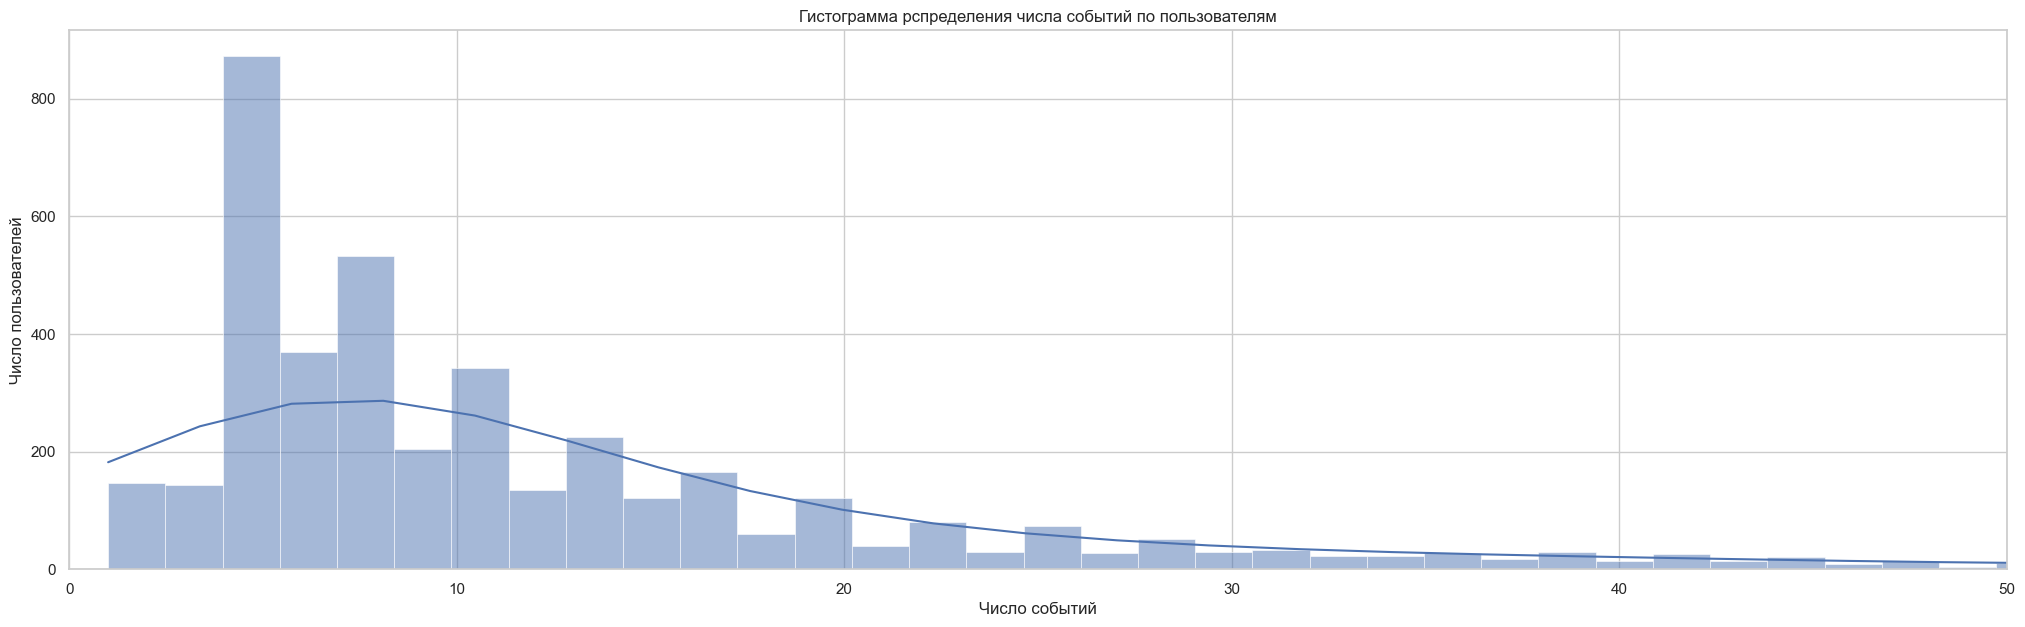

В среднем на 1 пользователя приходится 17 событий


In [97]:
plt.subplots(figsize=(25, 7))
sns.histplot(mobile.groupby('user_id').agg({'event_name':'count'})['event_name'], kde=True)
plt.xlim(0, 50)
plt.title('Гистограмма рспределения числа событий по пользователям')
plt.xlabel('Число событий')
plt.ylabel('Число пользователей')

plt.show()

print('В среднем на 1 пользователя приходится %d событий' %
      (mobile['event_name'].count() / mobile['user_id'].nunique()))

### Временной период исследования

Данные за какой период представлены в датасете? Найти максимальную и минимальную дату. Построить гистограмму по дате и времени.

In [38]:
print('Минимальная дата:', mobile['event_date_time'].min())
print('Максимальная дата:', mobile['event_date_time'].max())

Минимальная дата: 2019-10-07 00:00:00
Максимальная дата: 2019-11-03 23:58:13


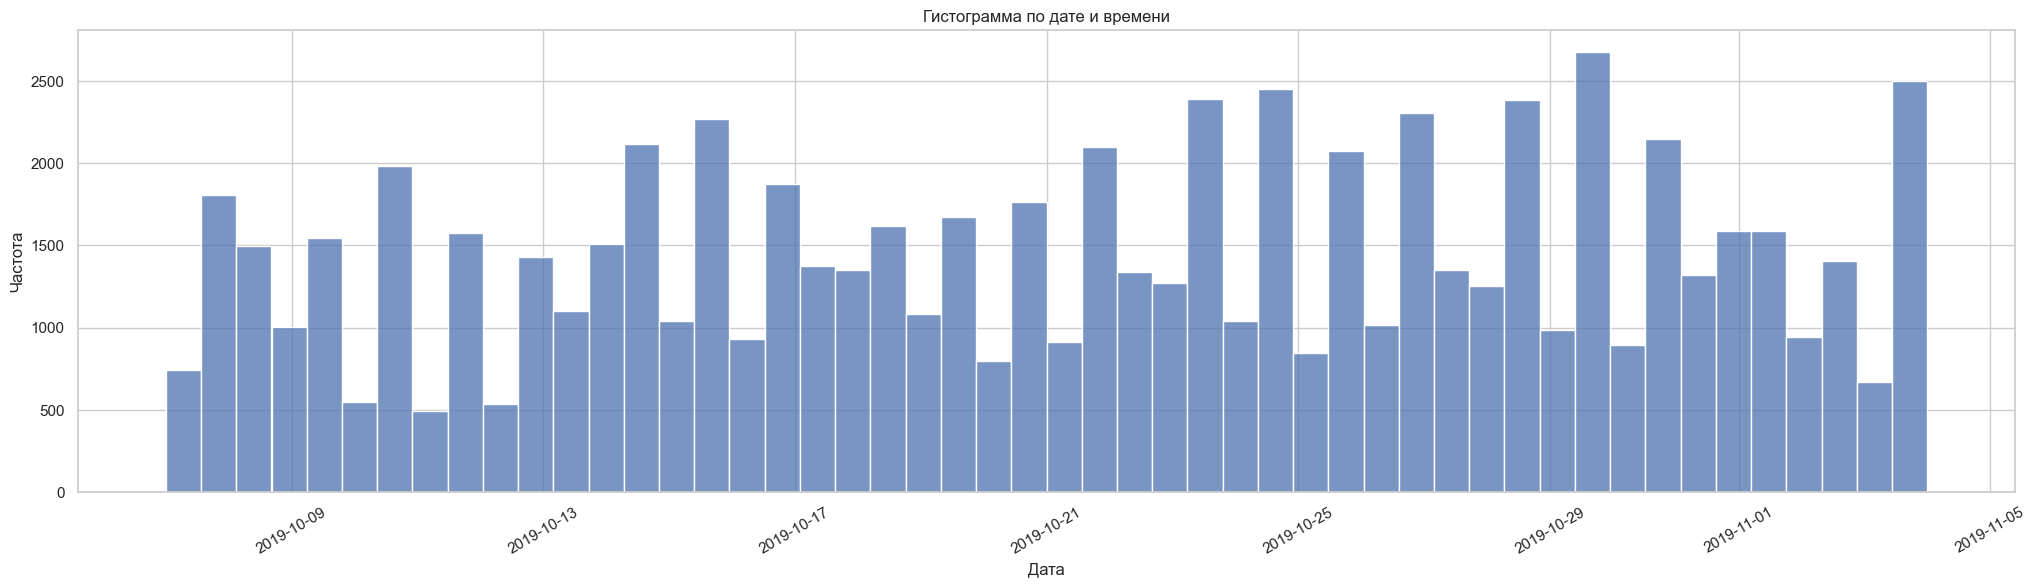

In [39]:
# Задаю размер графика:
plt.subplots(figsize=(25, 6))
# Строю гистограму
sns.histplot(mobile['event_date_time'], bins=50)

plt.title('Гистограмма по дате и времени')
plt.xlabel('Дата')
plt.ylabel('Частота')
plt.xticks(rotation=30)
plt.show()

**Вывод:**

Данные в датасете представлены за период с 07.10.2019 по 03.11.2019. Распределение событий по времени показывает, что есть отдельные пики использования приложения, но в общем и целом приложением пользуются однородно на всём временном отрезке.

### Бизнес-метрики


**DAU / WAU**

Рассчитать и визуализировать DAU / WAU в представленном датасете - есть ли закономерности в пользовательском поведении?

In [40]:
# Посчитаю метрики DAU и WAU: 
dau = (mobile.groupby('event_date').agg({'user_id':'nunique'})).rename(columns={'user_id':'dau'})
window = 7
dau['dau_mean'] = dau['dau'].rolling(window).mean()
wau = (mobile.groupby('event_week').agg({'user_id':'nunique'})).rename(columns={'user_id':'wau'})

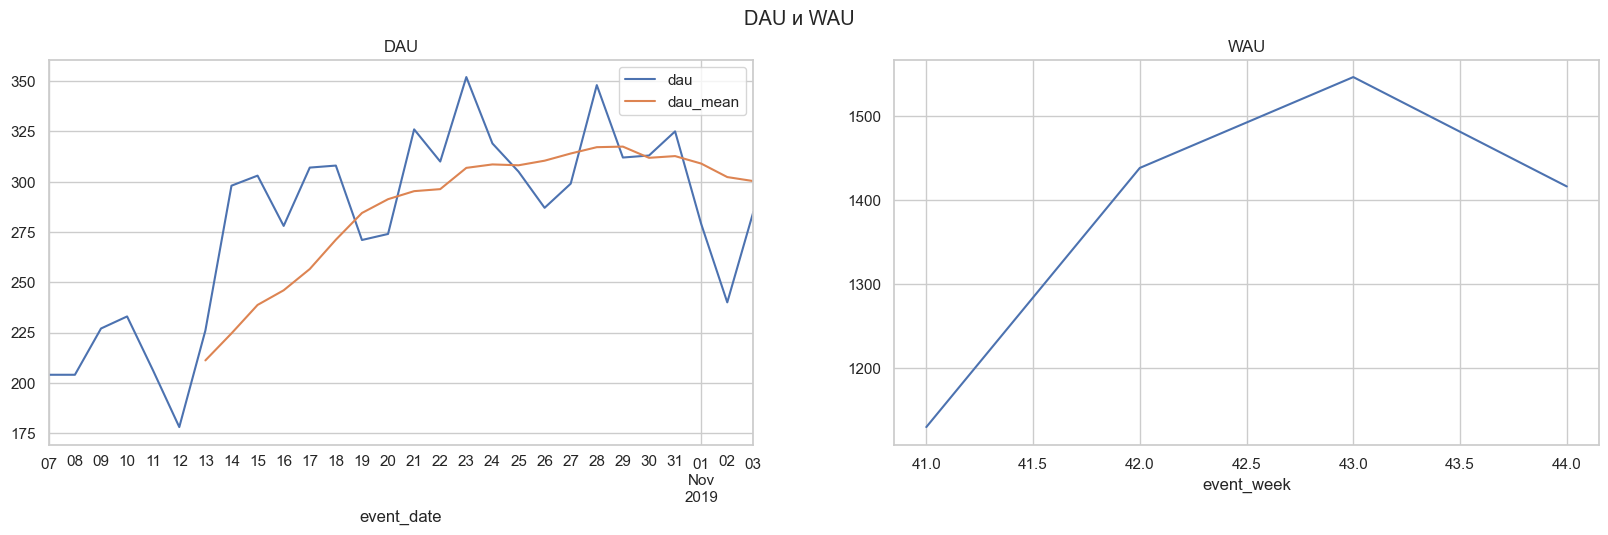

In [41]:
# Нарисую графики DAU и WAU
fig = plt.figure(figsize=(20, 5))
fig.suptitle('DAU и WAU')

ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)
dau.plot(grid = True, ax=ax_1).set(title='DAU')
wau.plot(grid = True, legend = False, ax=ax_2).set(title='WAU')
plt.show()

#После расчёта метрик оставлю только те столбцы, которые понадобятся в дальнейшем исследовании:
mobile = mobile[['user_id', 'source', 'event_name', 'event_date_time']]

**Вывод:**

Показатели метрик DAU и WAU растут на изученном периоде, но стоит отметить, что к концу октября 2019 наметился тренд на снижение пользовательской активности. Возможно, всплеск объясняется рекламными кампаниями в начале октября, а возможно к концу октября разработчики выкатили обновление с новыми фичами, которые не понравились части пользователей, нужно обсудить с разработчиками.

[Оглавление](#section_id)

## Поведенческие сценарии
<a id='section_id3'></a>

### Виды событий
Посмотреть, какие события есть в датасете, как часто они встречаются. Отсортировать события по частоте.

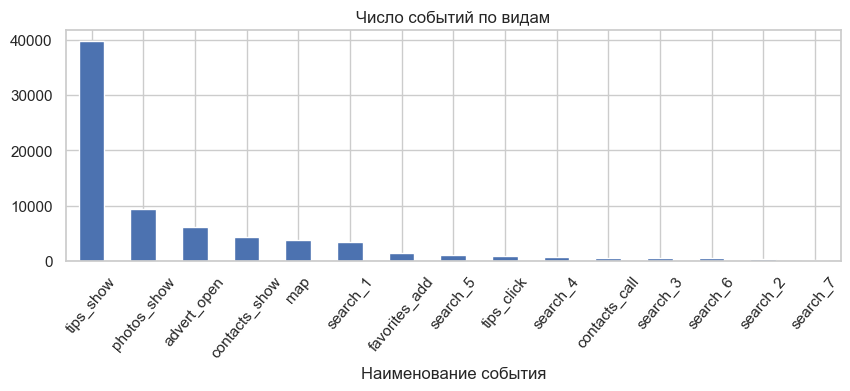

In [100]:
events_quantity = mobile[['event_name', 'user_id']].groupby(['event_name']).count()\
    .sort_values(by='user_id', ascending=False)
events_quantity.plot(kind='bar', legend=False, title='Число событий по видам', figsize=(10, 3))\
    .set_xlabel('Наименование события')
plt.xticks(rotation=50)
plt.show()

**Вывод:**

`tips_show` - самый полпулярный вид события, как следует из описания данных - это техническое автоматическое событие, выполняемое приложением автоматически.

### Уникальные пользователя в разрезе событий 
Посчитать, сколько уникальных пользователей совершали каждое из этих событий. Отсортируйте события по числу уникальных пользователей.

Число уникальных пользователей: 4293


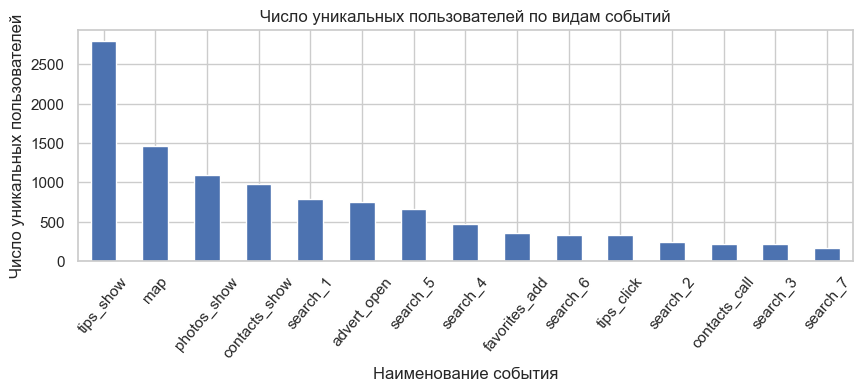

In [101]:
print('Число уникальных пользователей:', mobile['user_id'].nunique())

(mobile.groupby(['event_name'])['user_id'].nunique().sort_values(ascending=False)
     .plot(kind='bar', legend=False, title='Число уникальных пользователей по видам событий', figsize=(10, 3)))
plt.xlabel('Наименование события')
plt.ylabel('Число уникальных пользователей')
plt.xticks(rotation=50)
plt.show()

**Вывод:**

Уникальные пользователи распределяются по видам событий аналогичным образом больше всего сталкиваются с автоматическим событием `tips_show`, далее идут события `map`, `photos_show`, `contacts_show` с каждым из которых взаимодействовали более тысячи пользователей. остальные события, в том числе 7 видов `search` менее популярны.

### Пользовательские сессии

Разбить все события на сессии в разрезе уникальных пользователей. На основе сессий предположить, в каком порядке происходят события. Выявить поведенческие сценарии, их количество.

In [44]:
# Сортирую датафрейм по пользователям и времени
mobile = mobile.sort_values(by=['user_id', 'event_date_time']).reset_index(drop=True)

# Задаю тайм-аут сессии:
step = '15Min'
# Идентификация тайм-аута сессии между событиями:
interval = (mobile.groupby('user_id')['event_date_time'].diff() > pd.Timedelta(step)).cumsum()
# Добавление сессий в датафрейм:
mobile['session_id'] = mobile.groupby(['user_id', interval], sort=False).ngroup() + 1

mobile.head(3)

,user_id,source,event_name,event_date_time,session_id
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,tips_show,2019-10-07 13:39:46,1
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,tips_show,2019-10-07 13:40:31,1
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,tips_show,2019-10-07 13:41:06,1


На основании снижающегося стандартного отклонения и диаграммы размаха длин сессий, (анализ ниже) выявлен оптимальный тайм-аут сессии в 15 минут.

In [45]:
# Посмотрю на количество событий в разрезе сессий с самым большим количеством событий
mobile['session_id'].value_counts().head(10)

6914     139
8640     129
7756     127
7633     112
11032    104
10456    104
188      100
330       97
10171     93
6539      91
Name: session_id, dtype: int64

Отдельно посмотрю на сессию с самым большим числом событий

In [46]:
# Поиск номера сессии с наибольшим числом событий в датафрейме:
session_long = mobile.groupby('session_id')['user_id'].count().sort_values(ascending=False).idxmax()
mobile[mobile['session_id'] == session_long]

,user_id,source,event_name,event_date_time,session_id
43260,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,tips_show,2019-10-08 15:44:03,6914
43261,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,tips_show,2019-10-08 15:46:28,6914
43262,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,tips_show,2019-10-08 15:48:20,6914
43263,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,tips_show,2019-10-08 15:48:47,6914
43264,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,tips_show,2019-10-08 15:49:32,6914
...,...,...,...,...,...
43394,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,map,2019-10-08 16:54:14,6914
43395,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,favorites_add,2019-10-08 16:54:32,6914
43396,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,favorites_add,2019-10-08 16:54:36,6914
43397,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,favorites_add,2019-10-08 16:54:43,6914


Сессия длилась чуть больше часа. Посмотрю какие есть события в сессии и как они распределяются по количеству. Ниже посчитаю длительность сессий всего датафрейма.

In [47]:
mobile[mobile['session_id'] == session_long]['event_name'].value_counts()

map              58
favorites_add    50
tips_show        31
Name: event_name, dtype: int64

**Вывод:**

Пользователи разбиты на сессии на основе тайм-аута в 15 минут между событиями. Итого получилось 11 537 сессий.

#### Длительность сессий

Посмотрю длительность сессии в минутах, для этого создам датаффрейм, сгруппированный по номеру сессии, через аггрегацию выведу минимальное и максимально вермя сессии в отдельные колонки, по ним рассчитаю продолжительность. 

In [48]:
session_duration = mobile.groupby('session_id').agg(session_start = ('event_date_time', 'min'), 
                                                session_end = ('event_date_time', 'max')).reset_index()
session_duration['session_duration_m'] = (session_duration['session_end'] 
                                          - session_duration['session_start']).dt.total_seconds().div(60)

display(session_duration.sort_values(by='session_duration_m', ascending = False).head())

# Посмотрю на статистическое описание длинн сессий:
session_duration[['session_duration_m']].describe()

,session_id,session_start,session_end,session_duration_m
8639,8640,2019-10-13 13:44:01,2019-10-13 17:37:40,233.65
7597,7598,2019-10-27 01:24:21,2019-10-27 04:36:45,192.40
10044,10045,2019-11-02 19:46:32,2019-11-02 22:46:36,180.07
10455,10456,2019-10-22 19:57:57,2019-10-22 22:42:47,164.83
7632,7633,2019-10-29 14:37:20,2019-10-29 17:19:48,162.47


,session_duration_m
count,"11,537.00"
mean,9.44
std,14.19
min,0.00
25%,0.08
50%,4.32
75%,13.05
max,233.65


Сессии в датафрейме довольно сильно отличаются друг от друга. Стандартное отклонение ~14, средняя длина около 9 с половиной минут, медианное значение ~4 минут 20 секунд. 

Построю диаграмму размаха длины сессий.

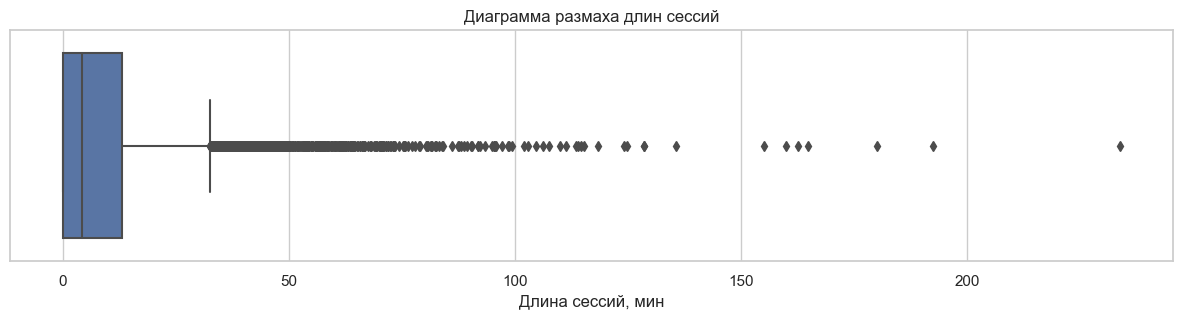

In [49]:
plt.subplots(figsize=(15, 3))
sns.boxplot(data = session_duration, x='session_duration_m')

plt.xlabel('Длина сессий, мин')
plt.title('Диаграмма размаха длин сессий')
plt.show()

Добавлю продолжительность сессий в основной датафрейм:

In [50]:
mobile = mobile.merge(session_duration, on='session_id', how='left')

**Вывод:**

Средняя длина около 9 с половиной минут, медианное значение ~4 минут 20 секунд. На диаграмме размаха наглядно видно - большая часть сессий длится до 15 минут, но также отмечу, что есть много сессий-выбросов, длиннее 20 минут или правее верхнего уса (3 квартиль * 1.5). 

В датафрейм добавлена длительность сессии - использую данное поле для проверки статистической разницы между пользователями, пришедшими из `google` и `yandex`.

#### Распределение количества событий по сессиям

Посмотрю распределение числа событий по сессиям и построю гистограмму

1     2680
2     1702
3     1206
4     1044
5      852
6      636
7      490
8      425
9      343
10     296
Name: event_name, dtype: int64

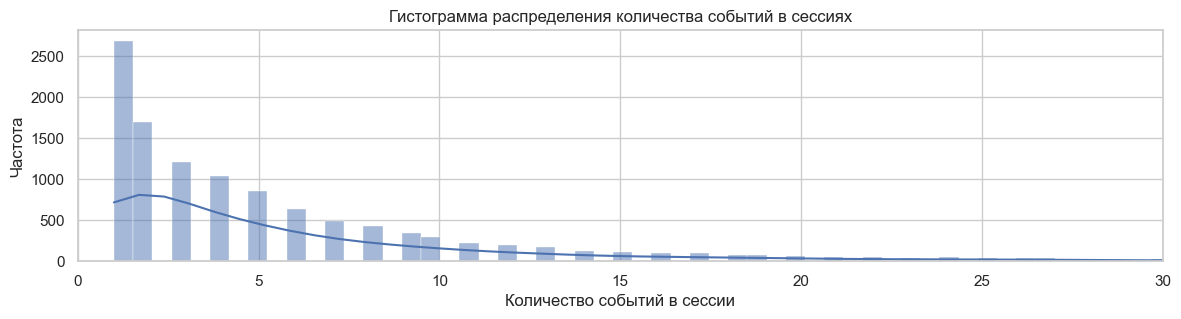

In [51]:
display(mobile.groupby('session_id')['event_name'].count().value_counts().head(10))

plt.subplots(figsize=(14, 3))
sns.histplot(mobile.groupby('session_id')['event_name'].count(), kde=True)\
    .set(title='Гистограмма распределения количества событий в сессиях')
plt.xlim(0, 30)
plt.xlabel('Количество событий в сессии')
plt.ylabel('Частота')
plt.show()

**Вывод:**

Большая часть сессий (около половины) состоит из 1-2 событий.

### Воронки пользовательских сценариев

По сценариям описать воронки (конверсии) - какая доля пользователей проходит на следующий шаг каждой воронки (от числа пользователей на предыдущем). Выявить сценарии с лучшей и худшей конверсиями за представленный период.

In [52]:
sessions_unique = (mobile.groupby(['user_id', 'session_id'])
                   .agg(event_unique=('event_name', 'unique'), 
                        avg_session_length = ('session_duration_m', 'mean'))).reset_index()

sessions_unique['event_unique'] = sessions_unique['event_unique'].apply(lambda x: str(x))
sessions_unique[sessions_unique['event_unique'].str.contains('contacts_show')]['event_unique'].\
    value_counts().reset_index().head(20)

,index,event_unique
0,['tips_show' 'contacts_show'],387
1,['contacts_show'],263
2,['contacts_show' 'contacts_call'],138
3,['contacts_show' 'tips_show'],99
4,['map' 'tips_show' 'contacts_show'],91
5,['photos_show' 'contacts_show'],85
6,['search_1' 'contacts_show' 'contacts_call'],53
7,['search_1' 'contacts_show'],47
8,['contacts_show' 'photos_show'],40
9,['search_1' 'photos_show' 'contacts_show'],39


In [53]:
#!pip install kaleido

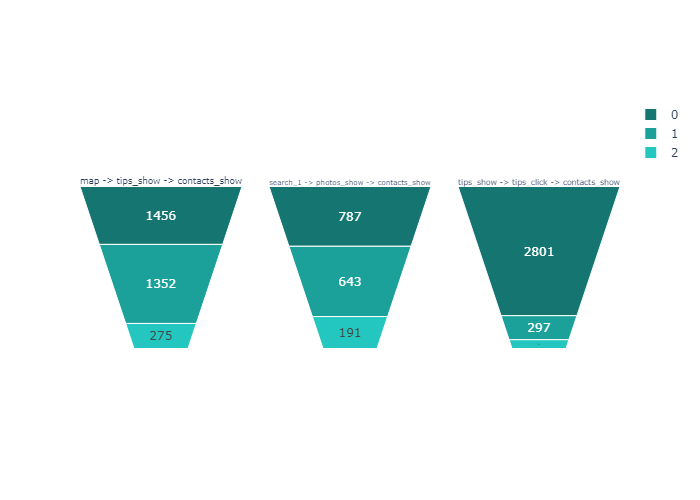

In [118]:
# Подготовка данных для графиков воронок по трём сценариям
df_funnel = mobile[['event_name', 'user_id']]

step_list_1 = ['map', 'tips_show', 'contacts_show']

user_list_1_1 = df_funnel.query('event_name == "map"')['user_id'].unique()
user_list_1_2 = df_funnel.query('user_id in @user_list_1_1 and event_name == "tips_show"')['user_id'].unique()
user_list_1_3 = df_funnel.query('user_id in @user_list_1_2 and event_name == "contacts_show"')['user_id'].unique()
user_list_1 = [len(user_list_1_1), len(user_list_1_2), len(user_list_1_3)]

step_list_2 = ['search_1', 'photos_show', 'contacts_show']

user_list_2_1 = df_funnel.query('event_name == "search_1"')['user_id'].unique()
user_list_2_2 = df_funnel.query('user_id in @user_list_2_1 and event_name == "photos_show"')['user_id'].unique()
user_list_2_3 = df_funnel.query('user_id in @user_list_2_2 and event_name == "contacts_show"')['user_id'].unique()
user_list_2 = [len(user_list_2_1), len(user_list_2_2), len(user_list_2_3)]

step_list_3 = ['tips_show', 'tips_click', 'contacts_show']

user_list_3_1 = df_funnel.query('event_name == "tips_show"')['user_id'].unique()
user_list_3_2 = df_funnel.query('user_id in @user_list_3_1 and event_name == "tips_click"')['user_id'].unique()
user_list_3_3 = df_funnel.query('user_id in @user_list_3_2 and event_name == "contacts_show"')['user_id'].unique()
user_list_3 = [len(user_list_3_1), len(user_list_3_2), len(user_list_3_3)]


fig = go.Figure()

fig.add_trace(go.Funnelarea(
    values = user_list_1, textinfo = 'value', marker = {'colors':['#157570', '#1CA09A', '#23C7BF']},
    title = {'text': 'map -> tips_show -> contacts_show'}, domain = {"x": [0, 0.3], "y": [0, 1]}))

fig.add_trace(go.Funnelarea(
    values = user_list_2, textinfo = 'value',
    title = {'text': 'search_1 -> photos_show -> contacts_show'}, domain = {"x": [0.35, 0.65], "y": [0, 1]}))

fig.add_trace(go.Funnelarea(
    values = user_list_3, textinfo = 'value',
    title = {'text': 'tips_show -> tips_click -> contacts_show'}, domain = {"x": [0.7, 1], "y": [0, 1]}))

# для отображения воронок в GitHub
fig.show('png')

**Вывод:**

Выделены 3 пользовательских сценария на основе частотности. 
1. 'map', 'tips_show', 'contacts_show'
2. 'search_1', 'photos_show', 'contacts_show'
3. 'tips_show', 'tips_click', 'contacts_show'

Ниже будет проанализирована конверсия по ним.

### Конверсия пользователей

В разрезе поведенческих сценариев проанализировать, какая доля пользователей доходит от первого события до просмотра контактов?

Для анализа отобраны 3 сценария:
1. 'map', 'tips_show', 'contacts_show'
2. 'search_1', 'photos_show', 'contacts_show'
3. 'tips_show', 'tips_click', 'contacts_show'

In [55]:
# Соберу датафрейм по числу пользователей в разрезе сценариев для расчёта конверсии
columns = ['step_1', 'step_2', 'contacts_show']
conversion = pd.DataFrame(data = [user_list_1, user_list_2, user_list_3], columns = columns)
# Посчитаю конверсию:
conversion['conversion'] = conversion['contacts_show'] / conversion['step_1']
conversion

,step_1,step_2,contacts_show,conversion
0,1456,1352,275,0.19
1,787,643,191,0.24
2,2801,297,91,0.03


**Вывод:**

В рамках анализа трёх наиболее популярных сценариев, наилучшая конверсия выявлена у сценария 2 ('search_1', 'photos_show', 'contacts_show') на уровне 24%. Наименьшая конверсия в 3% у сценария 3 ('tips_show', 'tips_click', 'contacts_show').

### Время в разрезе поведенческих сценариев

Проанализировать как различается время в разрезе поведенческих сценариев пользователей?

In [56]:
print('Сценарий 1:', step_list_1)
print('Сценарий 2:', step_list_2)
print('Сценарий 3:', step_list_3)

Сценарий 1: ['map', 'tips_show', 'contacts_show']
Сценарий 2: ['search_1', 'photos_show', 'contacts_show']
Сценарий 3: ['tips_show', 'tips_click', 'contacts_show']


In [57]:
(sessions_unique[sessions_unique['event_unique'].str.contains('contacts_show')]
     .groupby('event_unique')
     .agg(session_counts=('session_id', 'count'), avg_session_length = ('avg_session_length', 'mean'),
         median_session_length = ('avg_session_length', 'median'))
     .sort_values(by='session_counts', ascending=False).reset_index().head(17))

,event_unique,session_counts,avg_session_length,median_session_length
0,['tips_show' 'contacts_show'],387,17.28,12.30
1,['contacts_show'],263,2.19,0.00
2,['contacts_show' 'contacts_call'],138,2.41,0.25
3,['contacts_show' 'tips_show'],99,10.29,6.70
4,['map' 'tips_show' 'contacts_show'],91,18.67,11.73
5,['photos_show' 'contacts_show'],85,11.05,8.28
6,['search_1' 'contacts_show' 'contacts_call'],53,7.42,4.18
7,['search_1' 'contacts_show'],47,5.98,3.18
8,['contacts_show' 'photos_show'],40,10.32,7.96
9,['search_1' 'photos_show' 'contacts_show'],39,14.50,12.32


**Вывод:**

В разрезе трёх выбранных сценариев, среднее время сессии колеблется от 14 минут 30 секунд по 2 сценарию до 27 минут по сценарию №3, у сценария №1 среднее время сессии на уровне 18 минут 40 секунд. 

Медианные значения времени сессии у сценариев 1 и 2 ниже средних значений - это говорит о наличии длительных сессий-выбросов. Медианное значение сценария 3 немного ниже среднего значения, что сигнализирует о большом количестве коротких сессий.

### Влияние источника на совершение целевого действия

Посмотреть влияет ли источник привлечения пользователя на долю пользователей, совершивших целевое действие - просмотр контактов.

In [58]:
# Уникальные пользователи в разрезе источников:
source_users = mobile.groupby('source').agg(count_users=('user_id', 'nunique')).reset_index()

# Уникальные пользователи с целевым действием в разрезе источников:
source_contacs_show = mobile[mobile['event_name'] == 'contacts_show'].\
        groupby('source').agg(count_users_contasts_show=('user_id', 'nunique')).reset_index()

# Объединю датафреймы
source = source_users.merge(source_contacs_show, on='source')

In [59]:
# Посчитаю конверсию:
source['conversion'] = source['count_users_contasts_show'] / source['count_users']
source

,source,count_users,count_users_contasts_show,conversion
0,google,1129,275,0.24
1,other,1230,228,0.19
2,yandex,1934,478,0.25


**Вывод:**

Источник не является существенным критерием совершения целевого действия. Однако пользователи, привлечённые через рекламный канал Yandex совершают целевое действие несколько чаще с уровнем конверсии в 25%, при конверсии пользователей Google в 24% и конверсией 19% с прочих источников. 

Тем не менее, в рамках проверки статистических гепотез, хочу проверить, различаются ли конверсии пользователей в просмотры контактов из источников yandex и google.

[Оглавление](#section_id)

## Проверка статистических гипотез
<a id='section_id4'></a>

### Пользователи групп tips_show-tips_click и tips_show
Одни пользователи совершают действия `tips_show` и `tips_click`, другие — только `tips_show`. 

Проверить гипотезу: конверсия в просмотры контактов различается у этих двух групп.

- Н0: конверсии пользователей в просмотры контактов из групп `tips_show`-`tips_click` и `tips_show` **не различаются**
- Н1: конверсии пользователей в просмотры контактов из групп `tips_show`-`tips_click` и `tips_show` **различаются**

Для проверки статистической гипотезы соберу данных пользователей по группам:
- в первую группу попадут пользователи, которые совершили действие `tips_show`-`tips_click` (в один датафрейм без целевого действия, в другой с целевым действием)
- во вторую группу попадут пользователи, которые совершили только действие `tips_show` (аналогично, в один датафрейм без целевого действия, в другой с целевым действием)

In [121]:
# Исключение пользователей группы 1 из группы 2:
users_click_show = sessions_unique[sessions_unique['event_unique'].str.contains('tips_show') 
                & sessions_unique['event_unique'].str.contains('tips_click')][['user_id']]\
                .groupby('user_id').count().reset_index()['user_id'].tolist()

# Формирование групп:
group_click_show = sessions_unique[sessions_unique['event_unique'].str.contains('tips_show') 
                                   & sessions_unique['event_unique'].str.contains('tips_click')]\
                                    .groupby('user_id')['user_id'].agg('nunique').count()

group_click_show_cont = sessions_unique[sessions_unique['event_unique'].str.contains('tips_show')
                                        & sessions_unique['event_unique'].str.contains('tips_click')
                                        & sessions_unique['event_unique'].str.contains('contacts_show')]\
                                        .groupby('user_id')['user_id'].agg('nunique').count()

group_show = sessions_unique.query('user_id not in @users_click_show')[
                            sessions_unique['event_unique'].str.contains('tips_show')
                            & (~sessions_unique['event_unique'].str.contains('tips_click'))]\
                            .groupby('user_id')['user_id'].agg('nunique').count()

group_show_cont = sessions_unique.query('user_id not in @users_click_show')[
                                  sessions_unique['event_unique'].str.contains('tips_show')
                                  & (~sessions_unique['event_unique'].str.contains('tips_click'))
                                  & sessions_unique['event_unique'].str.contains('contacts_show')]\
                                  .groupby('user_id')['user_id'].agg('nunique').count()

In [122]:
# Проверка, что пользователи двух групп не пересекаются 
group_click_show_users = sessions_unique[sessions_unique['event_unique'].str.contains('tips_show') 
                                   & sessions_unique['event_unique'].str.contains('tips_click')]\
                                    .groupby('user_id').agg(user_unique=('user_id','nunique')).reset_index()

group_show_users = sessions_unique.query('user_id not in @users_click_show')[
    sessions_unique['event_unique'].str.contains('tips_show')
                            & (~sessions_unique['event_unique'].str.contains('tips_click'))]\
                            .groupby('user_id').agg(user_unique=('user_id','nunique')).reset_index()

# Для проверки пересекающихся пользователей, объединяю датафреймы:
groups_test = group_click_show_users.merge(group_show_users, on='user_id', how='left')

# Фильтрую объединённый датафрейм по подтянутой колонке, если в ней только NaN, значит пересекающихся пользователей нет.
groups_test[groups_test['user_unique_y'].isna() == False]

,user_id,user_unique_x,user_unique_y


In [123]:
alpha = 0.05 # критический уровень статистической значимости

successes = np.array([group_click_show_cont, group_show_cont])
trials = np.array([group_click_show, group_show])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение:', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение: 0.04013386370892125
Отвергаем нулевую гипотезу: между долями есть значимая разница


**Вывод:**

p-value ниже критического уровня статистической значимости, отвергаем нулевую гипотезу - между долями есть статистически значимая разница.

### Пользователи из разных источников

Проверить гипотезу: конверсия в просмотры контактов различается у пользователей из разных источников - `google` и `яндекс`.

- H0: конверсии пользователей в просмотры контактов из источников `google` и `yandex` **не различаются**.
- H1: конверсии пользователей в просмотры контактов из источников yandex и google **различаются**.

Воспользуюсь датафреймом, рассчитанным для одного из предыдущих пунктов анализа:

In [124]:
source

,source,count_users,count_users_contasts_show,conversion
0,google,1129,275,0.24
1,other,1230,228,0.19
2,yandex,1934,478,0.25


In [125]:
alpha = 0.05 # критический уровень статистической значимости

google_ind = 0
yandex_ind = 2
successes = np.array([source.loc[google_ind,'count_users_contasts_show'], source.loc[yandex_ind,'count_users_contasts_show']])
trials = np.array([source.loc[google_ind,'count_users'], source.loc[yandex_ind,'count_users']])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение:', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение: 0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод:**

Нет оснований утверждать, что доли пользователей из разных источников статистически отличаются.

### Средняя длительность сессий пользователей из google и яндекс

Посчитаю статистическую значимость различий в средней продолжительности сессии между группами пользователями, пришедшими из `google` и `yandex`.

Воспользуюсь критерием Манна-Уитни

- H0: Средняя длительность сессии пользователей, пришедших через `google` **не превосходит** среднее время пользователей из `yandex`
- H1: Средняя длительность сессии пользователей, пришедших через `google` **превосходит** среднее время пользователей из `yandex`

In [126]:
google = mobile[mobile['source'] == 'google'].groupby('session_id')[['session_duration_m']].agg('mean')
yandex = mobile[mobile['source'] == 'yandex'].groupby('session_id')[['session_duration_m']].agg('mean')

# Критический уровень статистиеской значимости в 5%
alpha = 0.05

results = st.ttest_ind(google, yandex)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.00082904]
Отвергаем нулевую гипотезу


In [127]:
print('Средняя продолжительность сессии пользователей из google: {:,.2f}'.format(google['session_duration_m'].mean()))

print('Средняя продолжительность сессии пользователей из yandex: {:,.2f}'.format(yandex['session_duration_m'].mean()))

Средняя продолжительность сессии пользователей из google: 9.34
Средняя продолжительность сессии пользователей из yandex: 10.43


**Вывод:**

Средняя продолжительность сессии статистически значимо не отличается в разрезе источников google и yandex.

[Оглавление](#section_id)

## Dashboard

[Tableau Dashboard](https://public.tableau.com/app/profile/damir2910/viz/da_49_13_final_mobile_app/sheet3?publish=yes)

[Presentation](https://drive.google.com/file/d/1AnQ0sg8OrI9eW7fZRQV1iZZ_RwiqDcqU/view?usp=sharing)

## Результаты исследования
<a id='section_id5'></a>


**Описание данных**

Для проведения исследования использовался датасет с данными пользователей по взаимодействию с мобильным приложением "Ненужные вещи".

**Предобработка данных**

В ходе первичного анализа пропуски, дубликаты и какие-либо аномалии, связанные с качеством данных не обнаружены. В ходе предобработки названия колонок приведены к единому стилистическому формату.

**Исследовательский анализ данных - EDA**

В рамках исследовательского анализа данных выявлено:
- Количество событий в датасете: 73079
- Число уникальных пользователей: 4293
- Временной период: с 07.10.2019 по 03.11.2019
- Посчитаны метрики DAU / WAU 

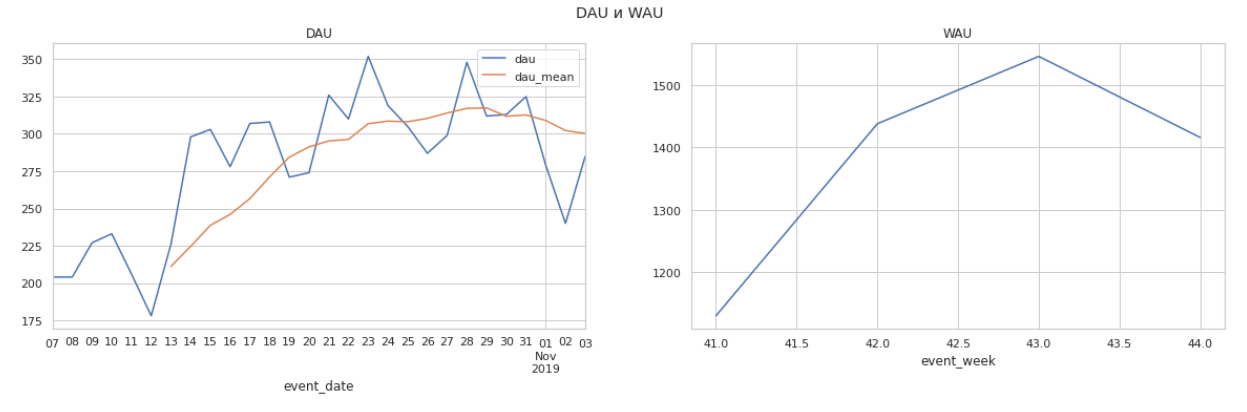

### Поведенческие сценарии

При анализе поведенческих сценариев, выявлено:
1. tips_show - самый полпулярный вид события, как следует из описания данных - это техническое автоматическое событие, выполняемое приложением автоматически.

2. Уникальные пользователи распределяются по видам событий аналогичным образом больше всего сталкиваются с автоматическим событием tips_show, далее идут события map, photos_show, contacts_show с каждым из которых взаимодействовали более тысячи пользователей. остальные события, в том числе 7 видов search менее популярны.

3. Пользователи разбиты на сессии на основе тайм-аута в 15 минут между событиями. Итого получилось 11 537 сессий.

-  Средняя длина около 9 с половиной минут, медианное значение ~4 минут 20 секунд. На диаграмме размаха наглядно видно - большая часть сессий длится до 15 минут, но также отмечу, что есть много сессий-выбросов, длиннее 20 минут или правее верхнего уса (3 квартиль * 1.5). В датафрейм добавлена длительность сессии - использую данное поле для проверки статистической разницы между пользователями, пришедшими из `google` и `yandex`.

- Большая часть сессий (около половины) состоит из 1-2 событий.

4. Выделены 3 пользовательских сценария на основе частотности. 
   
    - 'map', 'tips_show', 'contacts_show'
    - 'search_1', 'photos_show', 'contacts_show'
    - 'tips_show', 'tips_click', 'contacts_show'

5. В рамках анализа трёх наиболее популярных сценариев, наилучшая конверсия выявлена у сценария 2 ('search_1', 'photos_show', 'contacts_show') на уровне 24%. Наименьшая конверсия в 3% у сценария 3 ('tips_show', 'tips_click', 'contacts_show').

6. В разрезе трёх выбранных сценариев, среднее время сессии колеблется от 14 минут 30 секунд по 2 сценарию до 27 минут по сценарию №3, у сценария №1 среднее время сессии на уровне 18 минут 40 секунд. Медианные значения времени сессии у сценариев 1 и 2 ниже средних значений - это говорит о наличии длительных сессий-выбросов. Медианное значение сценария 3 немного ниже среднего значения, что сигнализирует о большом количестве коротких сессий.

7. Источник не является существенным критерием совершения целевого действия. Однако пользователи, привлечённые через рекламный канал Yandex совершают целевое действие несколько чаще с уровнем конверсии в 25%, при конверсии пользователей Google в 24% и конверсией 19% с прочих источников.

### Проверка статистических гипотез

Было проведено 3 проверки статистических гипотез
1. **Пользователи групп tips_show-tips_click и tips_show**
    
    Гипотеза: конверсия в просмотры контактов различается у этих двух групп.

- Н0: конверсии пользователей в просмотры контактов из групп `tips_show`-`tips_click` и `tips_show` **не различаются**
- Н1: конверсии пользователей в просмотры контактов из групп `tips_show`-`tips_click` и `tips_show` **различаются**

**Вывод:**
Применив z-критерий, выявлено, что p-value ниже критического уровня статистической значимости, отвергаем нулевую гипотезу - между долями есть статистически значимая разница.

2. **Пользователи из разных источников (google, yandex)**

Проверить гипотезу: конверсия в просмотры контактов различается у пользователей из разных источников - `google` и `yandex`.

- H0: конверсии пользователей в просмотры контактов из источников `google` и `yandex` **не различаются**.
- H1: конверсии пользователей в просмотры контактов из источников yandex и google **различаются**.

**Вывод:**
Применив z-критерий, нет оснований утверждать, что доли пользователей из разных источников статистически отличаются.

3. **Средняя длительность сессий пользователей из google и яндекс**

Проверить гипотзеу: средняя продолжительность сессии между группами пользователей статистически не отличается. Посчитаю статистическую значимость различий в средней продолжительности сессии между группами пользователями, пришедшими из `google` и `yandex`.

Воспользовался критерием Манна-Уитни

- H0: Средняя длительность сессии пользователей, пришедших через google не превосходит среднее время пользователей из yandex
- H1: Средняя длительность сессии пользователей, пришедших через google превосходит среднее время пользователей из yandex

**Вывод:**
Средняя продолжительность сессии статистически значимо не отличается в разрезе источников google и yandex.

### Рекоммендации по развитию приложения

1. Чтобы увеличить конверсию в событие просмотр контактов, то нужно стремиться уменьшать среднюю длительность сессии пользователя. 

2. С событиями `search_2`, `search_3`, `search_6`, `search_7` пользователи взаимодействуют минимально, стоит обсудить с продакт менеджером целесообразность поддерживания данных фич в приложении. Либо их нужно доработать, либо убрать, так как они непопулярны.

3. Доработать процесс поиска в приложении. Некоторые пользователи достаточно много проводят время в приложении. Возможно проблемы с навигацией.